# World Energy Consumption

Data from the [World Energy Consumption dataset](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption) on Kaggle.



In [147]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    linewidth=4
    )


%matplotlib inline

In [2]:
energy = pd.read_csv('World_Energy_Consumption.csv')

In [3]:
energy.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
energy.columns.values

array(['iso_code', 'country', 'year', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'gas_prod_change_pct',
       'gas_prod_change_twh', 'oil_prod_change_pct',
       'oil_prod_change_twh', 'energy_cons_change_pct',
       'energy_cons_change_twh', 'biofuel_share_elec',
       'biofuel_elec_per_capita', 'biofuel_cons_change_pct',
       'biofuel_share_energy', 'biofuel_cons_change_twh',
       'biofuel_consumption', 'biofuel_cons_per_capita',
       'carbon_intensity_elec', 'coal_share_elec', 'coal_cons_change_pct',
       'coal_share_energy', 'coal_cons_change_twh', 'coal_consumption',
       'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production',
       'coal_prod_per_capita', 'electricity_generation',
       'biofuel_electricity', 'coal_electricity', 'fossil_electricity',
       'gas_electricity', 'hydro_electricity', 'nuclear_electricity',
       'oil_electricity', 'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity',
       'renewable

### Find the number of NaN values by Year

In [5]:
year_group = energy.groupby('year')


In [6]:
year_nans = energy.groupby(['year']).apply(lambda x: x.isnull().sum())

In [7]:
year_nans

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
year,,,,,,,,,,,,,,,,,,,,,
1900,7,0,0,94,94,94,94,94,94,94,...,94,94,60,94,94,94,94,94,94,94
1901,7,0,0,59,23,92,35,80,28,94,...,94,94,64,94,94,94,94,94,94,94
1902,7,0,0,59,23,92,35,79,28,94,...,94,94,63,94,94,94,94,94,94,94
1903,7,0,0,59,23,92,35,78,28,94,...,94,94,63,94,94,94,94,94,94,94
1904,7,0,0,57,23,92,35,78,28,94,...,94,94,63,94,94,94,94,94,94,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,25,0,0,154,90,157,149,149,149,3,...,31,158,76,13,168,158,158,158,31,158
2017,20,0,0,162,185,155,169,148,169,131,...,20,147,230,2,158,147,147,147,20,147
2018,20,0,0,162,185,155,169,148,169,131,...,20,147,230,2,158,147,147,147,20,147


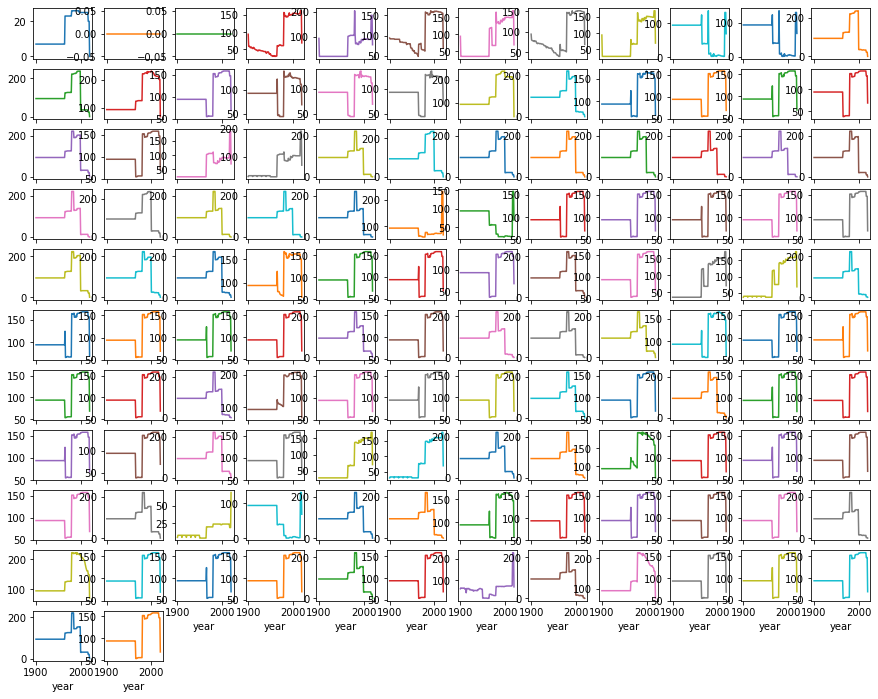

In [8]:
year_nans.plot.line(subplots=True,figsize=(15,12),sharex=True,
                   layout=(11,12),legend=False)
plt.show()

## Changes in Energy types

columns that contain the share of energy from various types end in columns with ```share_energy```. Let's use this to identify all of these columns

In [45]:
energy_share_cols = [col for col in energy.columns if 'share_energy' in col]

# add in iso_code, country, and year
cols_to_keep = ['iso_code','country','year']
cols_to_keep.append(energy_share_cols)

energy_share_cols.insert(0,'gdp')
energy_share_cols.insert(0,'per_capita_electricity')
energy_share_cols.insert(0,'population')
energy_share_cols.insert(0,'year')
energy_share_cols.insert(0,'country')
energy_share_cols.insert(0,'iso_code')





print(energy_share_cols)
energy_share = energy[energy_share_cols]

['iso_code', 'country', 'year', 'population', 'per_capita_electricity', 'gdp', 'biofuel_share_energy', 'coal_share_energy', 'fossil_share_energy', 'gas_share_energy', 'hydro_share_energy', 'low_carbon_share_energy', 'nuclear_share_energy', 'oil_share_energy', 'other_renewables_share_energy', 'renewables_share_energy', 'solar_share_energy', 'wind_share_energy']


In [46]:
print(energy_share_cols)

['iso_code', 'country', 'year', 'population', 'per_capita_electricity', 'gdp', 'biofuel_share_energy', 'coal_share_energy', 'fossil_share_energy', 'gas_share_energy', 'hydro_share_energy', 'low_carbon_share_energy', 'nuclear_share_energy', 'oil_share_energy', 'other_renewables_share_energy', 'renewables_share_energy', 'solar_share_energy', 'wind_share_energy']


In [47]:
energy_share.tail()

,iso_code,country,year,population,per_capita_electricity,gdp,biofuel_share_energy,coal_share_energy,fossil_share_energy,gas_share_energy,hydro_share_energy,low_carbon_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy
17427,ZWE,Zimbabwe,2015,13815000.0,679.535,2.503057e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17428,ZWE,Zimbabwe,2016,14030000.0,486.520,2.515176e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17429,ZWE,Zimbabwe,2017,14237000.0,513.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17430,ZWE,Zimbabwe,2018,14439000.0,632.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17431,ZWE,Zimbabwe,2019,14645000.0,617.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
us_energy = energy_share[energy_share['iso_code'] == 'USA']

In [49]:
us_energy.head()

,iso_code,country,year,population,per_capita_electricity,gdp,biofuel_share_energy,coal_share_energy,fossil_share_energy,gas_share_energy,hydro_share_energy,low_carbon_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy
16249,USA,United States,1900,77781472.0,NaN,4.780000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16250,USA,United States,1901,79271168.0,NaN,5.310000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16251,USA,United States,1902,80720440.0,NaN,5.370000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16252,USA,United States,1903,82271904.0,NaN,5.630000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16253,USA,United States,1904,83870024.0,NaN,5.560000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year'>

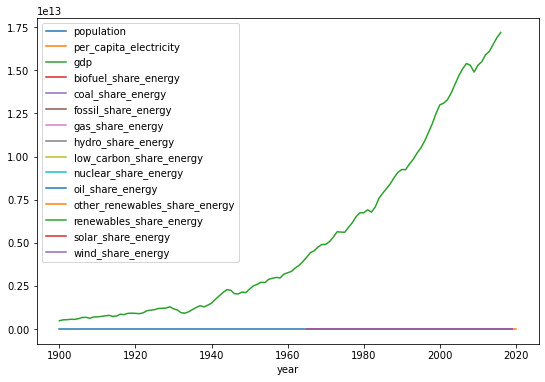

In [50]:
us_energy.plot.line(x='year',figsize=(9,6))

These contain some similar values. Let's find out what exactly those are.

In [51]:
us_limited = us_energy[(us_energy['year'] >= 2010) & 
                       (us_energy['year'] <= 2015)]

In [52]:
us_limited.head(6)

,iso_code,country,year,population,per_capita_electricity,gdp,biofuel_share_energy,coal_share_energy,fossil_share_energy,gas_share_energy,hydro_share_energy,low_carbon_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy
16359,USA,United States,2010,309011008.0,13349.233,1.530000e+13,1.212,22.460,85.862,25.099,2.597,14.138,8.576,38.303,0.758,5.562,0.030,0.965
16360,USA,United States,2011,311584000.0,13159.023,1.550000e+13,1.311,21.396,85.014,25.731,3.202,14.986,8.427,37.887,0.768,6.559,0.048,1.230
16361,USA,United States,2012,314044000.0,12889.166,1.590000e+13,1.347,19.421,85.087,27.621,2.833,14.913,8.373,38.045,0.796,6.541,0.093,1.471
16362,USA,United States,2013,316400992.0,12850.668,1.610000e+13,1.414,19.632,84.942,27.637,2.668,15.058,8.312,37.672,0.807,6.746,0.161,1.697
16363,USA,United States,2014,318672992.0,12881.037,1.650000e+13,1.419,19.386,84.880,27.942,2.518,15.120,8.262,37.552,0.828,6.859,0.288,1.807
16364,USA,United States,2015,320878016.0,12751.700,1.690000e+13,1.490,16.912,84.660,29.050,2.436,15.340,8.293,38.698,0.828,7.047,0.390,1.904


In [53]:
us_limited.columns.tolist()

['iso_code',
 'country',
 'year',
 'population',
 'per_capita_electricity',
 'gdp',
 'biofuel_share_energy',
 'coal_share_energy',
 'fossil_share_energy',
 'gas_share_energy',
 'hydro_share_energy',
 'low_carbon_share_energy',
 'nuclear_share_energy',
 'oil_share_energy',
 'other_renewables_share_energy',
 'renewables_share_energy',
 'solar_share_energy',
 'wind_share_energy']

We need to determine how these relate to each other. A few of these are combined categories. Let's determine what makes up the ```fossil_share_energy```, ```low_carbon_share_energy```, ```other_renewables```, and ```renewables```

Fossil Fuels include: coal, natural gas, oil

Renewable energy includes: wind, solar, biofuels, and hydroelectric

We need to determine where , , , , nuclear, , , and 

Fossil: coal, gas, oil

Renewable: biofule, hydro, solar, wind

Nuclear

In [27]:
us_limited['total'] = us_limited.loc[:,['fossil_share_energy', 'renewables_share_energy', 'nuclear_share_energy']].sum(axis=1).copy()



<ipython-input-27-6a74594be6db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_limited['total'] = us_limited.loc[:,['fossil_share_energy', 'renewables_share_energy', 'nuclear_share_energy']].sum(axis=1).copy()


In [28]:
us_limited.head(6)

,iso_code,country,year,biofuel_share_energy,coal_share_energy,fossil_share_energy,gas_share_energy,hydro_share_energy,low_carbon_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,total
16359,USA,United States,2010,1.212,22.460,85.862,25.099,2.597,14.138,8.576,38.303,0.758,5.562,0.030,0.965,100.000
16360,USA,United States,2011,1.311,21.396,85.014,25.731,3.202,14.986,8.427,37.887,0.768,6.559,0.048,1.230,100.000
16361,USA,United States,2012,1.347,19.421,85.087,27.621,2.833,14.913,8.373,38.045,0.796,6.541,0.093,1.471,100.001
16362,USA,United States,2013,1.414,19.632,84.942,27.637,2.668,15.058,8.312,37.672,0.807,6.746,0.161,1.697,100.000
16363,USA,United States,2014,1.419,19.386,84.880,27.942,2.518,15.120,8.262,37.552,0.828,6.859,0.288,1.807,100.001
16364,USA,United States,2015,1.490,16.912,84.660,29.050,2.436,15.340,8.293,38.698,0.828,7.047,0.390,1.904,100.000


We have confirmed how thes columns relate to each other. We are missing the ```low_carbon``` and ```other_renewables``` columns from our sum.

```low_carbon``` is renewable energy (biofuel, hydro, solar, wind) and nuclear summed.


```other_renewables``` is still a little unclear on the meaning. But we do not want to proceed without understanding this column. Some investigation leads us to understand that ```other_renewables``` is included in the sum of renweables = biofuel + hydro + solar + wind + other_renewables

## Visualizing changes in energy sources

Now that we have sorted out the energy shares for each country, let's begin to take a look at how these values have changed over time. We will create a visualization that shows us how ```fossil```, ```nuclear```, and ```renewables``` have changed as percentages over the period we have data for. We'll write a general function to do this so that we can quickly use it for any country.

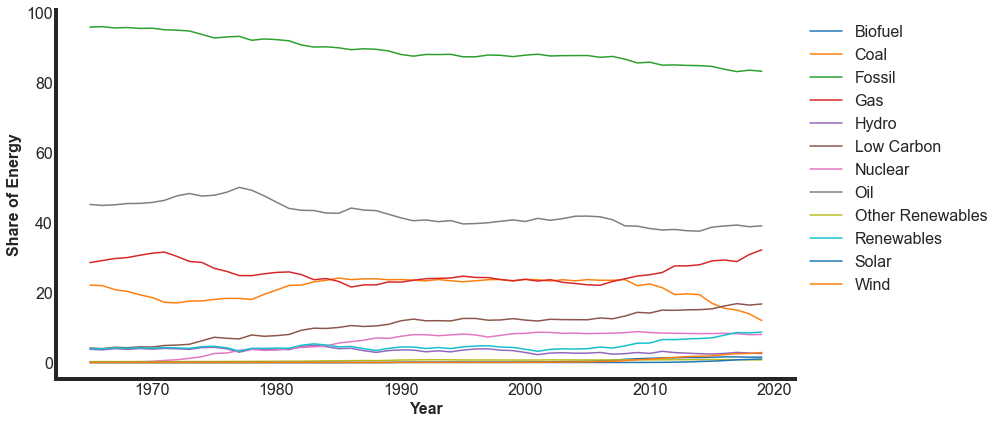

In [253]:






plt.figure(figsize=(14,6))

sns.lineplot(data=us_energy,x='year',y='biofuel_share_energy',label='Biofuel')
sns.lineplot(data=us_energy,x='year',y='coal_share_energy',label='Coal')
sns.lineplot(data=us_energy,x='year',y='fossil_share_energy',label='Fossil')
sns.lineplot(data=us_energy,x='year',y='gas_share_energy',label='Gas')
sns.lineplot(data=us_energy,x='year',y='hydro_share_energy',label='Hydro')
sns.lineplot(data=us_energy,x='year',y='low_carbon_share_energy',label='Low Carbon')
sns.lineplot(data=us_energy,x='year',y='nuclear_share_energy',label='Nuclear')
sns.lineplot(data=us_energy,x='year',y='oil_share_energy',label='Oil')
sns.lineplot(data=us_energy,x='year',y='other_renewables_share_energy',label='Other Renewables')
sns.lineplot(data=us_energy,x='year',y='renewables_share_energy',label='Renewables')
sns.lineplot(data=us_energy,x='year',y='solar_share_energy',label='Solar')
sns.lineplot(data=us_energy,x='year',y='wind_share_energy',label='Wind')


plt.legend(fontsize=16,bbox_to_anchor=(1.0,1.0))

plt.xlabel('Year', fontsize=16)
plt.ylabel('Share of Energy', fontsize=16)

#plt.xlim(-40,100)
#plt.ylim(-200,150)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#plt.axhline(y=0,color='k')

plt.show()




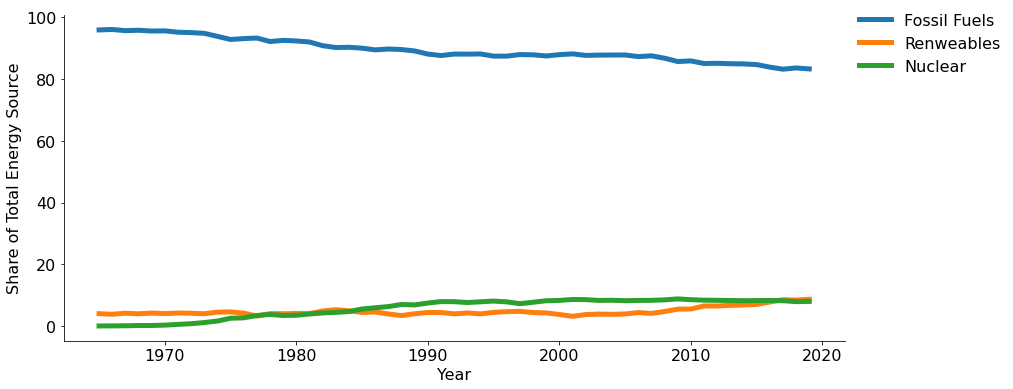

In [44]:
cols = ['fossil_share_energy', 'renewables_share_energy', 'nuclear_share_energy']

plt.figure(figsize=(14,6))
plt.plot(us_energy['year'],us_energy['fossil_share_energy'], linewidth=5.0, label='Fossil Fuels')
plt.plot(us_energy['year'],us_energy['renewables_share_energy'], linewidth=5.0, label = 'Renweables')
plt.plot(us_energy['year'],us_energy['nuclear_share_energy'], linewidth=5.0, label = 'Nuclear')


plt.xlabel('Year', fontsize=16)
plt.ylabel('Share of Total Energy Source', fontsize=16)
#plt.title('Daily Temperature in Ann Arbour, Michigan', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, frameon=False, bbox_to_anchor=(1.0, 1.05))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

This is not particualarly intersting at this point. We need a better story to tell. Let's consider some of the other infomration in our dataframe. Let's look at including gdp, per_capita_electricity, or population.

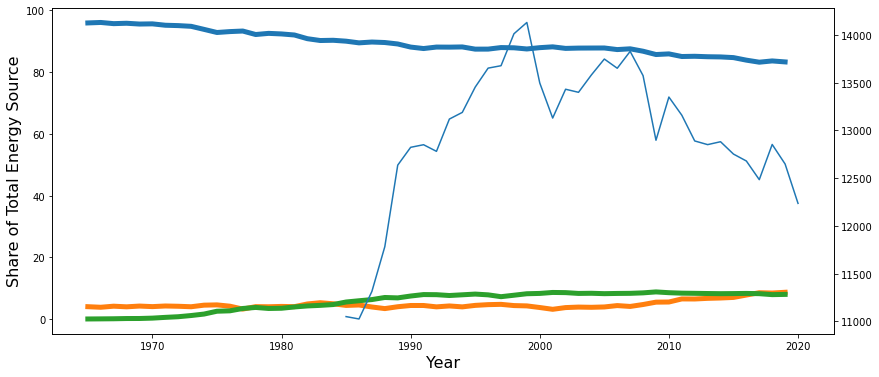

In [57]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(us_energy['year'],us_energy['fossil_share_energy'], linewidth=5.0, label='Fossil Fuels')
ax.plot(us_energy['year'],us_energy['renewables_share_energy'], linewidth=5.0, label = 'Renweables')
ax.plot(us_energy['year'],us_energy['nuclear_share_energy'], linewidth=5.0, label = 'Nuclear')

ax.set_xlabel('Year',fontsize=16)
ax.set_ylabel('Share of Total Energy Source', fontsize=16)


ax2 = ax.twinx()
ax2.plot(us_energy['year'],us_energy['per_capita_electricity'])


# plt.figure(figsize=(14,6))
# plt.plot(us_energy['year'],us_energy['fossil_share_energy'], linewidth=5.0, label='Fossil Fuels')
# plt.plot(us_energy['year'],us_energy['renewables_share_energy'], linewidth=5.0, label = 'Renweables')
# plt.plot(us_energy['year'],us_energy['nuclear_share_energy'], linewidth=5.0, label = 'Nuclear')


# plt.xlabel('Year', fontsize=16)
# plt.ylabel('Share of Total Energy Source', fontsize=16)
# #plt.title('Daily Temperature in Ann Arbour, Michigan', fontsize=16)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.legend(fontsize=16, frameon=False, bbox_to_anchor=(1.0, 1.05))

# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

plt.show()

## Aggregate by Country

Now, let's try aggregating some values by country to see if any interesting trends jump out.

In [98]:
country_list = energy['iso_code'].unique().tolist()

country_list.pop(1) # NAN is one of the values that we need to remove
country_list.remove('OWID_WRL')
country_list.remove('OWID_KOS')




#country_list

Let's calculate the change in a countries population, GDP, and ratio of energy sources between 1990 and 2015. We'll create a new dataframe with this information. 


In [200]:
def calculate_changes(df,country_code,first_year,last_year):
    '''
    Function to calculate the percent changes in the GDP, population, and share of renewable energy.
    
    INPUT:
        df: dataframe 
        country_code: 3 letter ISO code for country of interest
        first_year: first year you want to include in the calculation
        last_year: last year (inclusive) you want to include in the calculation
        
    OUTPUT:
        gdp_change: percent change in GDP from first_year to last_year
        pop_change: percent change in population from first_year to last_year
        energy_change: percent change in the share of (nuclear + renewable) energy. A positive
                        value indicates the country is using more (nuclear + renewable) energy in
                        the last year compared to the first
    '''
    
    # create a temporary dataframe with only the country of interest
    country_df = df[df['iso_code'] == country_code]

    # we want to calculate the percent changes between 1980 and 2015
    early_year = country_df[country_df['year'] == first_year]
    last_year = country_df[country_df['year'] == last_year]

    # we need to check if we have data for that year for that country
    # if not, we will return 0, 0, 0
    if early_year.shape[0] == 0:
        return(0,0,0)
    if last_year.shape[0] == 0:
        return(0,0,0)
        
    
    gdp_change = (last_year.iloc[0]['gdp'] - early_year.iloc[0]['gdp']) / last_year.iloc[0]['gdp'] * 100
    pop_change = (last_year.iloc[0]['population'] - early_year.iloc[0]['population']) / last_year.iloc[0]['population'] * 100

    energy_ratio_early =  early_year.iloc[0]['nuclear_share_energy'] + early_year.iloc[0]['renewables_share_energy']
    energy_ratio_last = last_year.iloc[0]['nuclear_share_energy'] + last_year.iloc[0]['renewables_share_energy']
    energy_change = (energy_ratio_last - energy_ratio_early) / energy_ratio_last * 100

    if np.isnan(gdp_change):
        gdp_change = 0
    if np.isnan(pop_change):
        pop_change = 0
    if np.isnan(energy_change):
        energy_change = 0
    
    return(gdp_change, pop_change, energy_change)
    
    

In [129]:
calculate_changes(energy,'ERI', 1992, 2015)

(0, 0, 0)

In [168]:
# let's keep track of how many we remove so we can decide on which numbers are best.



first_years = [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
               1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
               2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
               2010]
last_year = 2015

start_year_missing = {}

for y in first_years:
    year_test_df = pd.DataFrame(columns = ['country','pop_change','gdp_change','energy_change'])

    for country in country_list:
        gdp_change, pop_change, energy_change = calculate_changes(energy,country,y,last_year)
        new_row = {'country': country,
                  'pop_change': pop_change,
                  'gdp_change': gdp_change,
                  'energy_change': energy_change}
        year_test_df = year_test_df.append(new_row, ignore_index=True)

    missing = year_test_df[(year_test_df['pop_change'] == 0) |
                           (year_test_df['gdp_change'] == 0) |
                           (year_test_df['energy_change'] == 0)].count()
    #print(missing['country'])
    start_year_missing[y] = missing['country']

In [169]:
start_year_missing

{1980: 150,
 1981: 150,
 1982: 150,
 1983: 150,
 1984: 150,
 1985: 140,
 1986: 139,
 1987: 139,
 1988: 139,
 1989: 139,
 1990: 136,
 1991: 136,
 1992: 136,
 1993: 135,
 1994: 135,
 1995: 135,
 1996: 135,
 1997: 135,
 1998: 135,
 1999: 135,
 2000: 135,
 2001: 136,
 2002: 135,
 2003: 135,
 2004: 135,
 2005: 136,
 2006: 136,
 2007: 135,
 2008: 137,
 2009: 135,
 2010: 135}

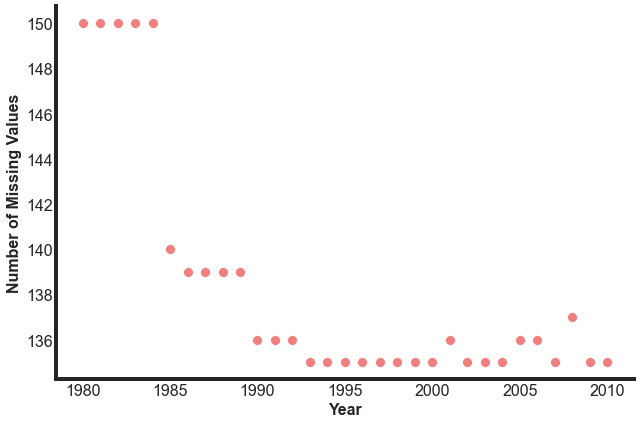

In [246]:
year_missing = pd.Series(start_year_missing)
#year_missing.head()

plt.figure(figsize=(9,6))
sns.scatterplot(data=year_missing,
               s = 100,
               color = 'lightcoral')


plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Missing Values', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.show()



Starting with 1980, we are missing 150 values. This decreases to 140 in 1985, then over the next 25 years, it goes down to 136 missing values, then oscillates some. We want the biggest lever here to see the change over the longest period of time, so we will start with 1985 as our start date. This gives us 10 additional countries that were not included before then, but still gives us 30 years of data to work with.

In [181]:
change_df = pd.DataFrame(columns = ['country','pop_change','gdp_change','energy_change'])

first_year = 1985
last_year = 2015

for country in country_list:
    gdp_change, pop_change, energy_change = calculate_changes(energy,country,first_year,last_year)
    new_row = {'country': country,
              'pop_change': pop_change,
              'gdp_change': gdp_change,
              'energy_change': energy_change}
    change_df = change_df.append(new_row, ignore_index=True)
    

# remove rows that have 0s
cleaned_change_df = change_df[(change_df['pop_change'] != 0) &
                           (change_df['gdp_change'] != 0) &
                           (change_df['energy_change'] != 0)]


In [183]:

cleaned_change_df.shape

(74, 4)

In [182]:
cleaned_change_df.head()

,country,pop_change,gdp_change,energy_change
2,DZA,43.536045,45.029240,-651.648352
6,ARG,29.852583,55.000000,-8.332766
9,AUS,34.547886,63.809524,31.088561
10,AUT,12.259477,63.496144,15.969432
11,AZE,30.728463,52.752510,39.517697


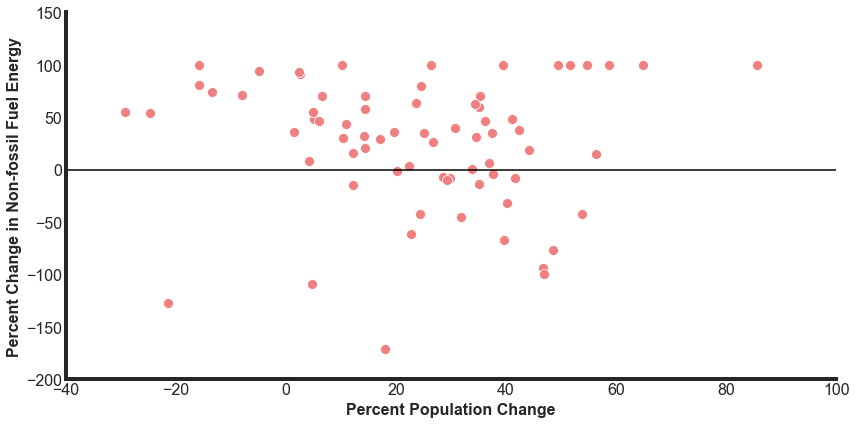

In [241]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=cleaned_change_df,
               x = 'pop_change',
               y = 'energy_change',
               color = 'lightcoral',
               s=100)

plt.xlabel('Percent Population Change', fontsize=16)
plt.ylabel('Percent Change in Non-fossil Fuel Energy', fontsize=16)

plt.xlim(-40,100)
plt.ylim(-200,150)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(y=0,color='k')

plt.show()

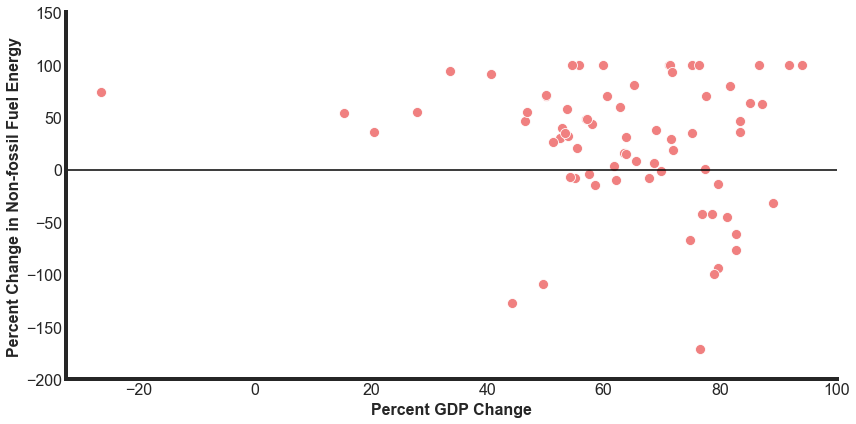

In [243]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=cleaned_change_df,
               x = 'gdp_change',
               y = 'energy_change',
               color = 'lightcoral',
               s=100)

plt.xlabel('Percent GDP Change', fontsize=16)
plt.ylabel('Percent Change in Non-fossil Fuel Energy', fontsize=16)

#plt.xlim(-40,100)
plt.ylim(-200,150)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(y=0,color='k')

plt.show()

In [244]:
cleaned_change_df.sort_values(by='gdp_change')
#cleaned_change_df['energy_change'].value_counts()

,country,pop_change,gdp_change,energy_change
200,UKR,-13.349806,-26.491647,73.630489
28,BGR,-24.652778,15.322581,53.722707
158,RUS,1.398765,20.420420,35.916568
105,LVA,-29.179179,27.915930,54.572374
16,BLR,-4.894586,33.513514,94.117647
...,...,...,...,...
145,OMN,64.893368,86.716553,100.0
209,VNM,34.291140,87.270503,62.449477
89,IND,40.132134,89.094767,-32.325519
172,SGP,51.609442,91.813517,100.0


In [229]:
def check_values(df,country_code,first_year,last_year):
    '''
    Function to check the percent changes
    '''
    country_df = df[df['iso_code'] == country_code]

    # we want to calculate the percent changes between the first year and the last year
    early_year = country_df[country_df['year'] == first_year]
    last_year = country_df[country_df['year'] == last_year]
    
    new_df = pd.concat([early_year[['country','iso_code','year','population','gdp',
                                  'nuclear_share_energy','renewables_share_energy']],
                       last_year[['country','iso_code','year','population','gdp',
                                  'nuclear_share_energy','renewables_share_energy']]],
                      axis=0)
    return new_df
    
    

    

In [245]:
check_df = check_values(energy,'UKR',1985,2015)
check_df.head()

,country,iso_code,year,population,gdp,nuclear_share_energy,renewables_share_energy
16037,Ukraine,UKR,1985,50919000.0,5.300000e+11,5.335,1.072
16067,Ukraine,UKR,2015,44922000.0,4.190000e+11,22.475,1.822


There are a number of significant outliers. Let's take a look at the most extreme changes to having less non-fossil energy sources between 1985 and 2015. 

- Trinidad and Tobago (TTO) has a -1233% decline in their share of non-fossil energies. TTO had a very small share of renewable energy (less than 0.1%), so this accentuates any changes.
- Algeria (DZA) went from a 0.6% share of renewable energy in 1985 to a 0.09% share in 2015. 
- Bangladesh (BGD) went from a 4% share of renewable energy in 1985 to a 0.7% share in 2015.

There are also 9 countries that have a 100% change in non-fossil fuel usage. This indicates that these countries started with 0 non-fossil use but now have some usage, even if small.


Ukraine is an interesting country that had a GDP that has gotten smaller but has significantly increased it's share of nuclear energy, leading to a 73% increase in non-fossil energies.
